In [37]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as ptr 
from sklearn.linear_model import LinearRegression

In [14]:
price_data= pd.read_csv('homeprices.csv')
price_data

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [23]:
#dummy variable
onehotenco= pd.get_dummies(price_data['town'])

merged= pd.concat([price_data, onehotenco], axis= 'columns')

#Remove unnecessary info

del merged['town']

#avoid the dummy variable trap

del merged['west windsor']

merged

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [26]:
features= DataFrame(data= merged, columns=['area', 'monroe township', 'robinsville'])
target= DataFrame(data= merged, columns=['price'])

In [32]:
reg= LinearRegression().fit(features, target)

#2800 area in robinsville
print(reg.predict([[2800, 0, 1]]))

#3400 area in west windsor
print(reg.predict([[3400, 0, 0]]))

[[590775.63964739]]
[[681241.66845839]]


c:\Users\NITIN VERMA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\NITIN VERMA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
#check how accurate your model is using score
reg.score(features, target)
# means its 95% accurate

0.9573929037221872

EXERCISE

In [36]:
car_data= pd.read_csv('carprices.csv')
car_data

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [42]:
#data frames
mile= DataFrame(data=car_data, columns=['Mileage'])
sell= DataFrame(data= car_data, columns=['Sell Price($)'])


Text(0, 0.5, 'Sell price')

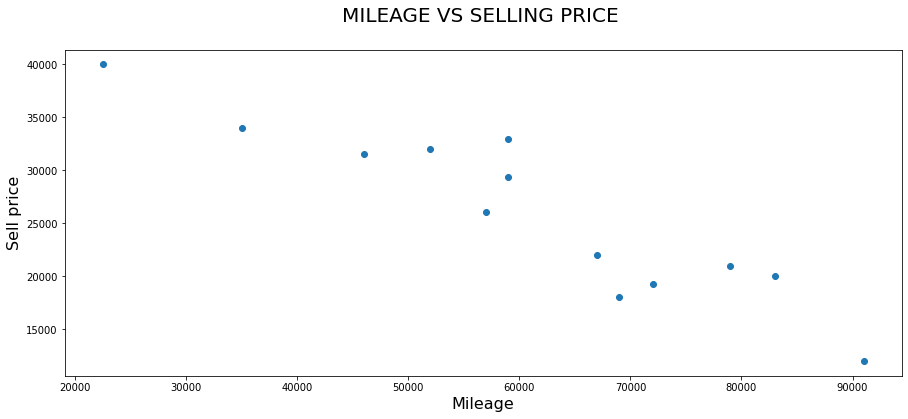

In [44]:
#plot mileage and sell price
ptr.figure(figsize=(15, 6))
ptr.scatter(mile, sell)
ptr.title('MILEAGE VS SELLING PRICE \n', fontsize= 20)
ptr.xlabel('Mileage', fontsize= 16)
ptr.ylabel('Sell price', fontsize= 16)


In [45]:
car_data

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [48]:
#dummy variable
d= pd.get_dummies(car_data['Car Model'])
d

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [55]:
#merge + remove extra info + avoid multi collinearity
merged= pd.concat([car_data, d], axis= 'columns')

del merged['Car Model']

del merged['Mercedez Benz C class']

merged

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [60]:
features= DataFrame(data= merged, columns=['Mileage', 'Age(yrs)', 'Audi A5', 'BMW X5'])
target= DataFrame(data= merged, columns=['Sell Price($)'])

In [66]:
regrestion= LinearRegression().fit(features, target)

# 4 year old mercedes with 45000 mileage

print(regrestion.predict([[45000, 4, 0, 0]]))

# 7 year BMW with 86000 mileage

print(regrestion.predict([[86000, 7, 0, 1]]))

print("Score of the prediction is :", regrestion.score(features, target))


[[36991.31721061]]
[[11080.74313219]]
Score of the prediction is : 0.9417050937281082


c:\Users\NITIN VERMA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\NITIN VERMA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
